In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline


In [41]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [42]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [43]:
team_1 = 'Chennai Super Kings'
team_2 = 'Kolkata Knight Riders'

In [44]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

# Winning Probability of Teams

Text(0.5, 1.0, 'KKR Total Runs Score Stats Per Count')

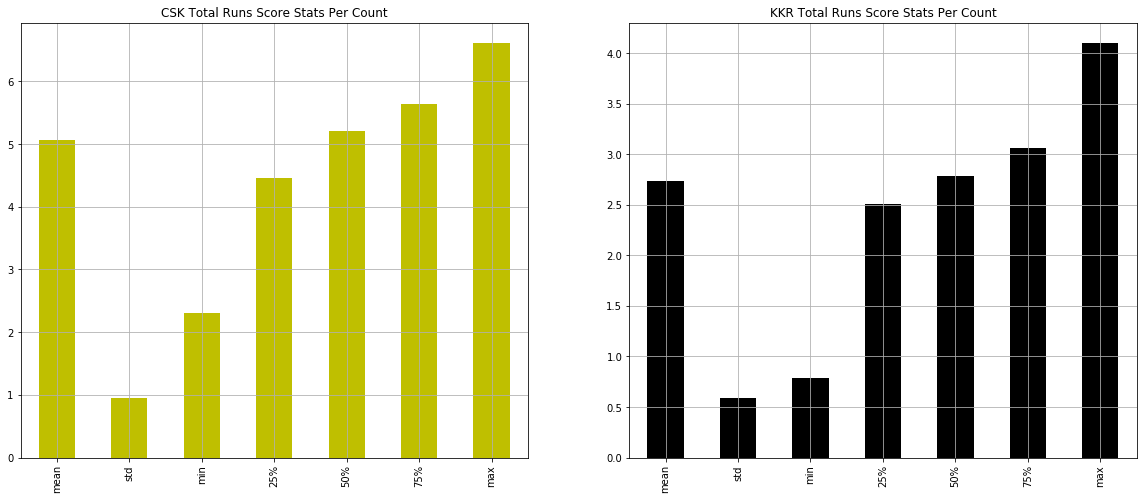

In [56]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
csk_runs = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()['total_runs']
kkr_runs = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()['total_runs']
(csk_runs.describe()[1:]/csk_runs.describe()[0]).plot(ax=ax[0], kind='bar', grid=True, color='y')
(kkr_runs.describe()[1:]/kkr_runs.describe()[0]).plot(ax=ax[1], kind='bar', grid=True, color='black')
ax[0].set_title("CSK Total Runs Score Stats Per Count")
ax[1].set_title("KKR Total Runs Score Stats Per Count")

Text(0.5, 1.0, 'Percentage of Winning')

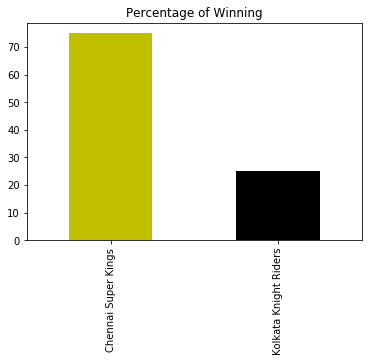

In [46]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
wins['Percentage Win Chance'].plot(kind='bar', color=['y', 'k'])
plt.title('Percentage of Winning')

# Difference of Balls needed more\less to reach 75 

In [47]:
csk_75 = list()
for match_id in delivery[(delivery['batting_team']==team_1)]['match_id'].unique():
    balls = 0
    runs = 0
    for run in delivery[(delivery['batting_team']==team_1) & (delivery['match_id']==match_id)]['total_runs']:
        balls += 1
        runs += run
        
        if runs in range(75, 81):
            break
    csk_75.append([match_id, runs, balls])
    
csk_75_df = pd.DataFrame(data=csk_75, columns=['match_id', 'Runs', 'Balls'])
csk_75_df['Balls'].describe()

count     33.000000
mean      63.060606
std       15.402799
min       34.000000
25%       53.000000
50%       63.000000
75%       74.000000
max      107.000000
Name: Balls, dtype: float64

In [48]:
kkr_75 = list()
for match_id in delivery[(delivery['batting_team']==team_2)]['match_id'].unique():
    balls = 0
    runs = 0
    for run in delivery[(delivery['batting_team']==team_2) & (delivery['match_id']==match_id)]['total_runs']:
        balls += 1
        runs += run
        
        if runs in range(100, 106):
            break
    kkr_75.append([match_id, runs, balls])
    
kkr_75_df = pd.DataFrame(data=kkr_75, columns=['match_id', 'Runs', 'Balls'])
kkr_75_df['Balls'].describe()

count     61.000000
mean      73.409836
std       15.751589
min       34.000000
25%       66.000000
50%       73.000000
75%       83.000000
max      123.000000
Name: Balls, dtype: float64

Subtraticng both the mean values gives the value in the range between: 8 to 15

# DL Chahar number of balls to first wicket

In [49]:
kkr_team = ['S Gill', 'N Rana', 'RA Tripathi', 'KD Karthik', 'SP Narine', 'EJG Morgan', 'PJ Cummins', 'LH Ferguson', 'P Krishna', 'V Chakravarthy']

Text(0.5, 1.0, 'DL Chahar wickets against KKR batsmen ')

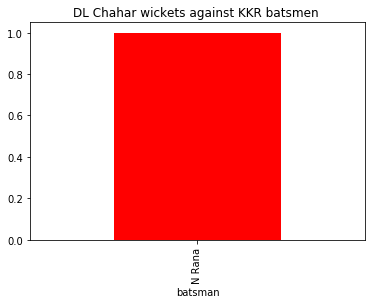

In [50]:
delivery[(delivery['bowler']=='DL Chahar') & (delivery['batsman'].isin(kkr_team)) & (delivery['player_dismissed']==1)].groupby('batsman').sum()['player_dismissed'].plot(kind='bar', color='red')
plt.title("DL Chahar wickets against KKR batsmen ")

,Balls to first wicket
mean,11.100000
std,6.188699
min,1.000000
25%,7.000000
50%,11.500000
75%,14.750000
max,24.000000


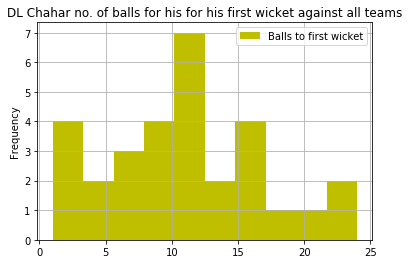

In [51]:
dl_chahar = delivery[(delivery['bowler']=='DL Chahar')]
balls = list()
mat_id = list()
for match_id in dl_chahar.match_id.unique():
    ball = 0
    for dismiss in dl_chahar[dl_chahar['match_id']==match_id]['player_dismissed']:
        ball += 1
        if dismiss == 1:
            break
    if (ball <= 24):
        balls.append(ball)
        mat_id.append(match_id)
    
dl_chahar_wk = pd.DataFrame(index=mat_id, data=balls, columns=['Balls to first wicket'])
dl_chahar_wk.plot(kind='hist', grid=True, color='y')
plt.title("DL Chahar no. of balls for his for his first wicket against all teams")
dl_chahar_wk.describe()[1:]

# Number of overs having 6s and 4s both.

count    55.000000
mean      2.854545
std       1.736516
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max      10.000000
Name: index, dtype: float64


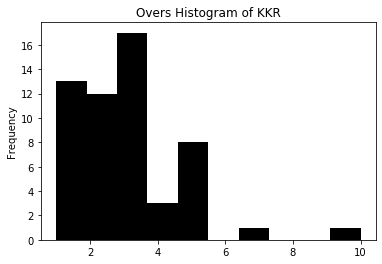

In [52]:
kkr_four_six = delivery[(delivery['batting_team']==team_2) & (delivery['batsman_runs'].isin([4, 6]))]
match_id_mi = list()
over_mi = list()
for match_id in kkr_four_six['match_id'].unique():
    for over in kkr_four_six[(kkr_four_six['match_id']==match_id)]['over'].unique():
        if len(kkr_four_six[(kkr_four_six['match_id']==match_id) & (kkr_four_six['over']==over)]['batsman_runs'].value_counts())==2:
            match_id_mi.append(match_id)
            over_mi.append(over)

kkr_over_hit = pd.DataFrame(index=match_id_mi, data=over_mi, columns=['Over']).reset_index()
kkr_over_hit['index'].value_counts().plot(kind='hist', color='k')
plt.title("Overs Histogram of KKR")
print(kkr_over_hit['index'].value_counts().describe())

count    30.000000
mean      2.866667
std       1.224276
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: index, dtype: float64


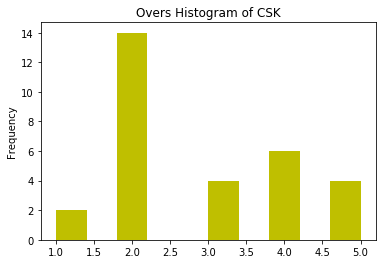

In [53]:
csk_four_six = delivery[(delivery['batting_team']==team_1) & (delivery['batsman_runs'].isin([4, 6]))]
match_id_csk = list()
over_csk = list()
for match_id in csk_four_six['match_id'].unique():
    for over in csk_four_six[(csk_four_six['match_id']==match_id)]['over'].unique():
        if len(csk_four_six[(csk_four_six['match_id']==match_id) & (csk_four_six['over']==over)]['batsman_runs'].value_counts())==2:
            match_id_csk.append(match_id)
            over_csk.append(over)

csk_over_hit = pd.DataFrame(index=match_id_csk, data=over_csk, columns=['Over']).reset_index()
csk_over_hit['index'].value_counts().plot(kind='hist', color='y')
plt.title("Overs Histogram of CSK")
print(csk_over_hit['index'].value_counts().describe())

The total overs lies in the range 3 - 4. Because the winning chances of KKR is less the expectation of such overs from KKR is less. So, we take the median values and summed and decreased by 1. 

# No-balls 

Text(0.5, 1.0, 'No of no-balls delivered by the today playing XI squad bowlers during 2016-2019')

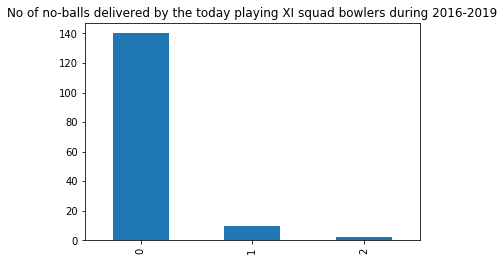

In [54]:
bowlers = ['PP Chawla', 'SN Thakur', 'DL Chahar', 'RA Jadeja', 'SR Watson', 'S Curran', 'PJ Cummins', 'LH Ferguson', 'P Krishna', 'V Chakravarthy', 'SP Narine']
delivery[delivery['bowler'].isin(bowlers)].groupby('match_id').sum()['noball_runs'].value_counts().plot(kind='bar')
plt.title("No of no-balls delivered by the today playing XI squad bowlers during 2016-2019")

# Summary

1. Different central tendency measures were plotted and compared for both the teams total match score. The winning chances of both the team were calculated using the winner column when played against each other. 
2. The number of balls to reach 75 runs per match was calculated. Then subtracting the mean number of balls for both the teams the range was estimated. 
3. The number of balls per match DL Chahar took for his first wicket was calculated. Using Histogram, The range was chosen where the max frequency occurred.
4. The overs where team hit both 4 and 6 were filtered, the number of such overs was calculated for both the teams. Summation of highest frequency occurrence value for both team's histogram to estimate range. 
5. Data was filtered for only when predicted bowlers bowled an over to find out how many no-balls run was given per match by combined bowlers. Then, a histogram of a number of no-balls was compared to find the range. 